## What are the most demanded skills for the top 3 most popular data roles?

###  Methodology

1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings

In [30]:
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [31]:
df_US = df[df['job_country']== 'United States']

In [32]:
df_skills = df_US.explode('job_skills')

In [33]:
df_skills[['job_title_short','job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [34]:
df_US_skill_count = df_skills.groupby(['job_skills','job_title_short']).size()

df_US_skill_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [35]:

type(df_US_skill_count)

pandas.core.series.Series

In [36]:
df_US_skill_count = df_US_skill_count.reset_index(name='skill_count')

In [37]:
df_US_skill_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,38
1,airflow,Cloud Engineer,27
2,airflow,Data Analyst,387
3,airflow,Data Engineer,4716
4,airflow,Data Scientist,1166
...,...,...,...
1865,zoom,Machine Learning Engineer,5
1866,zoom,Senior Data Analyst,50
1867,zoom,Senior Data Engineer,30
1868,zoom,Senior Data Scientist,25


In [38]:
df_US_skill_count.sort_values(by='skill_count',ascending=False,inplace=True)

In [39]:
df_US_skill_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [40]:
job_titles= df_US_skill_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles


['Data Analyst', 'Data Engineer', 'Data Scientist']

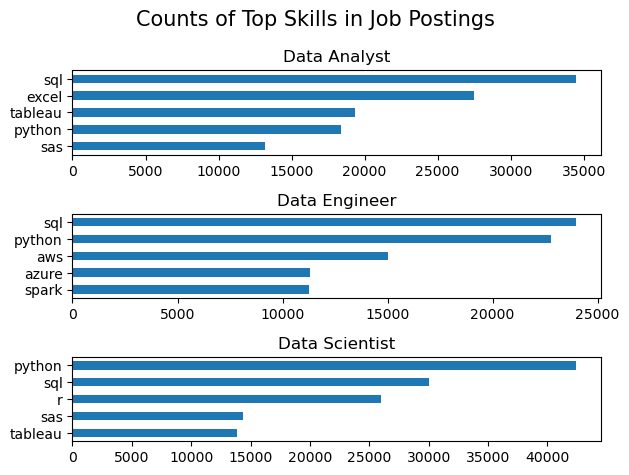

In [41]:
fig, ax = plt.subplots(len(job_titles),1)

for i,job_title in enumerate(job_titles):
    df_plot = df_US_skill_count[df_US_skill_count['job_title_short']== job_title].head(5)
    
    df_plot.plot(
        kind='barh',
        x='job_skills',
        y='skill_count',
        ax = ax[i],
        title = job_title
    )
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    
fig.suptitle('Counts of Top Skills in Job Postings',fontsize = 15)
    
fig.tight_layout()
plt.show()

In [42]:
df_US_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [48]:
df_US_skills_perc = pd.merge(df_US_skill_count,df_US_job_title_count,how='left',on='job_title_short')

df_US_skills_perc['skill_percent'] = 100 * df_US_skills_perc['skill_count']/df_US_skills_perc['jobs_total'] 

df_US_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


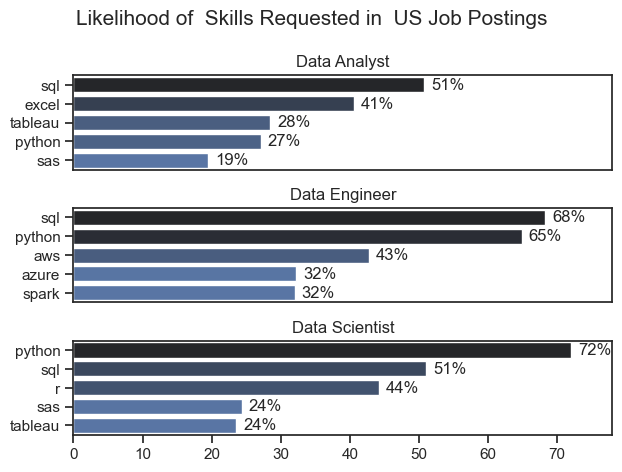

In [65]:
fig, ax = plt.subplots(len(job_titles),1)

for i,job_title in enumerate(job_titles):
    df_plot = df_US_skills_perc[df_US_skills_perc['job_title_short']== job_title].head(5)
    
    # df_plot.plot(
    #     kind='barh',
    #     x='job_skills',
    #     y='skill_percent',
    #     ax = ax[i],
    #     title = job_title
    # )
    
    sns.set_theme(style='ticks')
    sns.barplot(
        data=df_plot,
        x='skill_percent',
        y='job_skills',
        ax=ax[i],
        hue='skill_count',
        palette='dark:b_r'
    )
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    # used in matplotlib ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,78)
    
    for index,value in enumerate( df_plot['skill_percent']):
        ax[i].text(value + 1 ,index,f'{value:.0f}%',va = 'center')
    
    if i != len(job_titles) - 1 :
        ax[i].set_xticks([])
    
    
 
    
fig.suptitle('Likelihood of  Skills Requested in  US Job Postings',fontsize = 15)
    
fig.tight_layout()
plt.show()